# Three learning algorithms

**Author: Diana Mateus**

**Participants: Ke GUO & Martin CLERGEAU & ALEJANDRO GONZALEZ**



Scikit-learn is a very popular Machine Learning library for Python. In this notebook we will study how to put in practice the the three simple machine learning models 

*   Linear Regression
*   K-nearest neighbors
*   Naive Bayes 


**GOALS**: 

*   Understanding the purpose of data splitting in Machine Learning
*   Experimenting the train, val and test schemes with existing model from the scikit library
*   Evaluating a binary classification or a regression ML approach


## 0. Importing Modules and Data

Run the following lines to load the modules required for this lab.

In [26]:
import numpy as np #scientific computing (in ML it handles and operates on multi-dimensional arrays)
import matplotlib.pyplot as plt #for data visualization
import sklearn #for Machine Learning
import pandas as pd #for reading, writing and processing databases 


In [27]:
%matplotlib inline
%time

Wall time: 0 ns


### Loading and Splitting Data

Remember that the objective of a Supervised Machine Learning methods is

*   to learn from examples
*   how to make predictions
*   for unseen data!!! (Generalization)

To train a supervised learning model we need an annotated dataset. The dataset is often a matrix $X$ of dimensions NxD, with N  the number of points/samples and $D$ the dimensionality of the vector describing *one* sample.

We need part of the data to train the model parameters. Moreover, if the model has hyperparameters (non trainable parameters) their tunning should be done on a different subset of the data. Finally, to verify that the model generalises well, it is important to evaluate its performance on unseen data (not used for training nor validation). For the above reasons necessary to split the data matrix into three groups:
*  **Training set** : used to fit the model parameters.
*  **Validation set** : used to set the model hyper-parameters.
*  **Test set** : used only after training and validation have been finished to evaluate the performance of the method.

For real life problems is important to reduce the use of the test set to its minimum, to improve generalization.

**What to do**: Run the following sections to load and split two datasets: one for regression and one for classification. Explore and change the code lines to understand the dataset dimension and how to split it


### Datasets for Regression


In [28]:
from sklearn import datasets 
diabetes = datasets.load_diabetes()

# Explore on your own the dimensions of the dataset and their meaning. 
print('The full data matrix has shape',diabetes.data.shape) # 442 * 10

#print(diabetes)

X = diabetes.data[:, np.newaxis, 2]  # choose bmi

print(X.shape)

# Splitting the data matrix
X_train = X[:-30]
X_test = X[-30:]
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]

# Explore the data
#print(diabetes.DESCR) #Comment/Uncomment to see the dataset description
print('Dimension of the feature vector', diabetes.feature_names)
print('Dimension of the target value',diabetes.target.shape)
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)

#print(X_train)


The full data matrix has shape (442, 10)
(442, 1)
Dimension of the feature vector ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dimension of the target value (442,)
X train (412, 1)
X test (30, 1)
y train (412,)
y test (30,)


### Datasets for Classification

In [29]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

print(label_names)
print(labels.shape)
print(feature_names)
print(features.shape)
#print(data.DESCR) #Comment/Uncomment to see or hide the dataset description

['malignant' 'benign']
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


### Dataset splitting

The following scikit function splits the dataset into train and test

In [30]:
from sklearn.model_selection import train_test_split # split the data

X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size = 0.40, random_state = 42)


# 1. Training a ML model

When relying with on the scikit library, training a model is very simple. You  need to:
*   Load the model from scikit
*   Declare a new instance of the model 
*   Train the model parameters
*   Make predictions for new data
*   Evaluate the performance

Identify in the example code the above steps



### Model 1. Linear Regression

In [31]:
#Load and declare a new instance 
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [32]:
#Fit (train) the model 
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [941.43097333]
Intercept: 
 153.39713623331698


In [33]:
#Make predictions
y_pred = regr.predict(X_test)

In [34]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3035.06
Variance score: 0.41


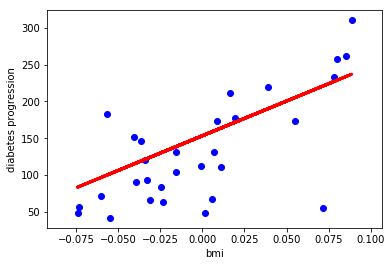

In [35]:
#Visualize 
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

## Model 2. K-Nearest Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=2)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
print(y2_pred_knn.shape)

(228,)


In [37]:
%%time
#Compute accuracy on the training set
train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9560117302052786
test accuracy 0.9166666666666666
Wall time: 5.96 ms


## Model 3. Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)
print(y2_pred_gnb.shape)

(228,)


In [39]:
#Compute accuracy on the training set
train_accuracy = gnbClassifier.score(X2_train, y2_train)

#Compute accuracy on the test set
test_accuracy = gnbClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9384164222873901
test accuracy 0.9517543859649122


# QUESTIONS



1.   In the regression example and keeping the size of the test set fixed, what is the effect on the (test) performance when we progressively increase the amount of training data? Demonstrate with performane plots and discuss.
2.   In the linear regression example and keeping the size of the test set fixed, what is the effect of using other varaibles other than the  'bmi' used during training?, is it using more information always better? (try adding new features, report results and discuss the results).
3.   In the above examples, we have split each dataset into two subsets each. Are two subsets (train and test) enough for the three models (lin reg, KNN, NaiveBayes)? Answer for each model.
4.   Repeat the KNN example, but splitting the dataset into three subsets(train,val,test). Progressively modify the hyperparameter k.  What is the best neighborhood size k?, what is the appropriate methodologogy to find this number? 
5.   How do we know if learning was really succesful (vs underfitting or overfitting?)
7. What is the highest performance you can achieve for the two classification methods? What model for classification is better?, why?
8.   Naive classifiers are probabilistic classifiers. How do we recover the probabilistic information associated to this model? What quantities can we recover?
9.   How is the performance score computed? create a function that calculates the TP, TN, FP and FN and replace the in-built score function with your own. Provide this code into the report. 
10.   We saw in the lecture that linear models were used for regression, while KNN and Naive Bayes were used for classification. Can we use linear models for classification?  KNN or Naive Bayes for regression problems?

**BONUS**
Implement your own version of one of the three algorithms and compare the results



### Question1
##### In the regression example and keeping the size of the test set fixed, what is the effect on the (test) performance when we progressively increase the amount of training data? Demonstrate with performane plots and discuss.

(442, 1)
Shape of training data 1 (412, 1)
Shape of training data 2 (442, 1)
Coefficients of training data 1: 
 [941.43097333]
Intercept of training data 1: 
 153.39713623331698
Coefficients of training data 2: 
 [949.43526038]
Intercept of training data 2: 
 152.1334841628967
Mean squared error of training data 1: 3035.06
Variance score of training data 1: 0.41
Mean squared error of training data 2: 2985.51
Variance score of training data 2: 0.42


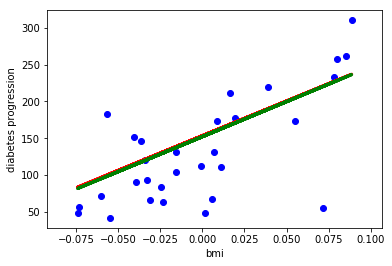

Text(0.5, 0, 'Numbers of training data')

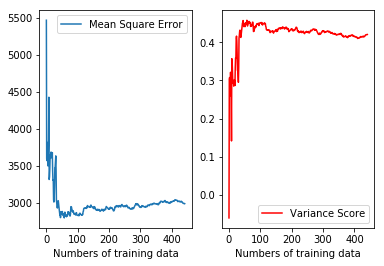

In [40]:
from sklearn import datasets 
diabetes = datasets.load_diabetes()

# Explore on your own the dimensions of the dataset and their meaning. 
#print('The full data matrix has shape',diabetes.data.shape) # 442 * 10

#print(diabetes)

X = diabetes.data[:, np.newaxis, 2]  # choose bmi

print(X.shape)

# Splitting the data matrix
X_train_1 = X[:-30]
X_test = X[-30:] # fixed
y_train_1 = diabetes.target[:-30]
y_test = diabetes.target[-30:]

print('Shape of training data 1',X_train_1.shape)

X_train_2 = X[:]
y_train_2 = diabetes.target[:]

print('Shape of training data 2',X_train_2.shape)

#Load and declare a new instance 
from sklearn import linear_model
regr_1 = linear_model.LinearRegression()
regr_2 = linear_model.LinearRegression()

#Fit (train) the model 
regr_1.fit(X_train_1, y_train_1)
print('Coefficients of training data 1: \n', regr_1.coef_)
print('Intercept of training data 1: \n', regr_1.intercept_)

regr_2.fit(X_train_2, y_train_2)
print('Coefficients of training data 2: \n', regr_2.coef_)
print('Intercept of training data 2: \n', regr_2.intercept_)



y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error of training data 1: %.2f" % mean_squared_error(y_test, y_pred_1))
print('Variance score of training data 1: %.2f' % r2_score(y_test, y_pred_1))


print("Mean squared error of training data 2: %.2f" % mean_squared_error(y_test, y_pred_2))
print('Variance score of training data 2: %.2f' % r2_score(y_test, y_pred_2))



plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_1, color='red', linewidth=3)
plt.plot(X_test, y_pred_2, color='green', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()


size = X.shape[0]
mse = []
score = []
for i in range(size):
    X_train = X[:i+1]
    y_train = diabetes.target[:i+1]
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    score.append(r2_score(y_test, y_pred))
plt.subplot(1,2,1)
plt.plot(mse,label='Mean Square Error')
plt.xlabel('Numbers of training data')
plt.legend()
plt.subplot(1,2,2)
plt.plot(score,color='red',label='Variance Score')
plt.legend()
plt.xlabel('Numbers of training data')




##### When increasing the size of training data, from the above result we can see that the mean squared error is decreasing and the variance score increases. Cause the training data already includes the test data. 

### Question2
##### In the linear regression example and keeping the size of the test set fixed, what is the effect of using other varaibles other than the 'bmi' used during training?, is it using more information always better? (try adding new features, report results and discuss the results)



Text(0.5, 0, 'Numbers of features of data')

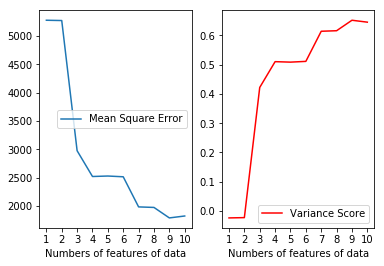

In [41]:
mse = []
score = []

for i in range(diabetes.data.shape[1]):
    X = diabetes.data[:,:i+1]
    X_train = X[:-30]
    X_test = X[-30:] # fixed
    y_train = diabetes.target[:-30]
    y_test = diabetes.target[-30:]
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    score.append(r2_score(y_test, y_pred))
    
plt.subplot(1,2,1)
plt.plot(range(1,11),mse,label='Mean Square Error')
plt.xticks(range(1,11))
plt.xlabel('Numbers of features of data')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1,11),score,color='red',label='Variance Score')
plt.xticks(range(1,11))
plt.legend()
plt.xlabel('Numbers of features of data')

##### When increasing the number of data features, from the above result we can see that the mean squared error is decreasing and the variance score increases. Casue after increasing the number of data features, the dataset contains more information

### Question3
##### In the above examples, we have split each dataset into two subsets each. Are two subsets (train and test) enough for the three models (lin reg, KNN, NaiveBayes)? Answer for each model

#####  Answer: The purpose of the validation set is to adjust the hyperparameters. Hyperparameters cannot be automatically adjusted during training because overfitting is prone to occur. Therefore, it is necessary to manually reset the hyperparameters each time, and then train and test on the validation set. For the linear regression and NaiveBayes, the answer is yes. But for the KNN we have to set another dataset like validation data set to see if the model is robust and find the best hyperparameters k .




### Question4
##### Repeat the KNN example, but splitting the dataset into three subsets(train,val,test). Progressively modify the hyperparameter k. What is the best neighborhood size k?, what is the appropriate methodologogy to find this number

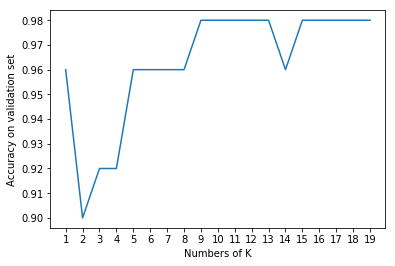

In [42]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

labels_l = labels[ : -50]
labels_v = labels[-50:]

features_l = features[ : -50]
features_v = features[-50:]


from sklearn.model_selection import train_test_split # split the data

X2_train, X2_test, y2_train, y2_test = train_test_split(features_l,labels_l,test_size = 0.40, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
val_score = []

for i in range(1,20):
    knnClassifier = KNeighborsClassifier(n_neighbors=i)
    knnClassifier.fit(X2_train, y2_train)
    
    y2_pred_knn = knnClassifier.predict(X2_test)
    
    val_pred = knnClassifier.predict(features_v)
    
    train_accuracy = knnClassifier.score(X2_train, y2_train)
    test_accuracy = knnClassifier.score(X2_test, y2_test)
    val_accuracy = knnClassifier.score(features_v,labels_v)
    
    val_score.append(val_accuracy)

plt.plot(range(1,20), val_score)
plt.xlabel('Numbers of K')
plt.ylabel('Accuracy on validation set')
plt.xticks(range(1,20))

plt.show()
    

#####  Answer: The best k equals to 8. According to the above figure we can see that 8 is the minimal number with the highest accuracy  during the loop.

### Question5
##### How do we know if learning was really succesful (vs underfitting or overfitting?)

##### Well for me, When the accuracy of the training set and the test set are both high enough, close to 95%, the model is successful. When the accuracy of the training set is significantly higher than that of the test set, overfitting occurs. At this time, it is necessary to reduce the training parameters and reduce the complexity of the model. When the accuracy of the training set and the test set are not high enough, it is underfitting and the model needs to be upgraded.

### Question6
##### What is the highest performance you can achieve for the two classification methods? What model for classification is better?, why?

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=8)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
print(y2_pred_knn.shape)

(208,)


In [64]:
%%time 
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=8)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
# detect the time
#Compute accuracy on the training set
train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9389067524115756
test accuracy 0.9326923076923077
Wall time: 8.41 ms


In [65]:
%%time
from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)
#Compute accuracy on the training set
train_accuracy = gnbClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = gnbClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9356913183279743
test accuracy 0.9423076923076923
Wall time: 8 ms


###### From the above result, we can see the best performance(we should notice that we change the neighbor to 8 to get the best performance). The Naive Bayes Classifier model performs better cause it has the higher test accuracy with less time.

### Question7
##### Naive classifiers are probabilistic classifiers. How do we recover the probabilistic information associated to this model? What quantities can we recover?

### Question8
##### How is the performance score computed? create a function that calculates the TP, TN, FP and FN and replace the in-built score function with your own. Provide this code into the report.

In [46]:
from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)



# My own socre function
def my_own_score(y_test, y_pred):
    TN = 0
    FP = 0
    TP = 0
    FN = 0
    for i in range(len(y_test)):
        if(y_test[i] == 0):
            if(y_pred[i] == 0):
                TN = TN + 1
            else:
                FP = FP + 1
        else:
            if(y_pred[i] == 1):
                TP = TP + 1
            else:
                FN = FN + 1
    score = (TN+TP)/len(y_test)
    return score

my_own_accuracy = my_own_score(y2_test, y2_pred_gnb)
test_accuracy = gnbClassifier.score(X2_test, y2_test) 

print(my_own_accuracy)
print(test_accuracy)

0.9423076923076923
0.9423076923076923


##### Returns the mean accuracy on the given test data and labels.In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample thateach label set be correctly predicted.

### Question9
##### We saw in the lecture that linear models were used for regression, while KNN and Naive Bayes were used for classification. Can we use linear models for classification? KNN or Naive Bayes for regression problems?

### Bonus
##### Implement your own version of one of the three algorithms and compare the results

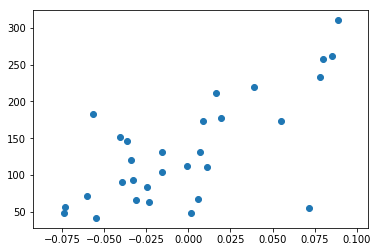

In [47]:
from sklearn import datasets 
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # choose bmi
X_train = X[:-30]
X_test = X[-30:]
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]
plt.scatter(X_test, y_test)

Coefficients: 
 [941.43097333]
Intercept: 
 153.39713623331698
Mean squared error: 3035.06
Variance score: 0.41


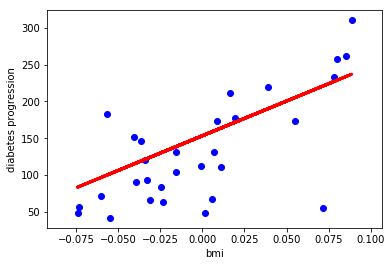

In [48]:
#Load and declare a new instance 
from sklearn import linear_model
regr = linear_model.LinearRegression()

#Fit (train) the model 
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

#Make predictions
y_pred = regr.predict(X_test)

#Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#Visualize 
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

[51.88985116] [-6626.42736923]
[[-6621.99555708]
 [-6626.46975772]
 [-6626.07826517]
 [-6625.96641015]
 [-6622.27519462]
 [-6622.72261468]
 [-6627.7001629 ]
 [-6629.26613313]
 [-6628.31536549]
 [-6625.57491759]
 [-6622.38704963]
 [-6628.48314801]
 [-6625.85455513]
 [-6628.53907552]
 [-6628.20351047]
 [-6626.13419267]
 [-6621.82777455]
 [-6628.14758297]
 [-6629.37798814]
 [-6628.03572795]
 [-6623.5615273 ]
 [-6629.54577067]
 [-6626.35790271]
 [-6627.64423539]
 [-6630.27282827]
 [-6625.40713507]
 [-6627.25274284]
 [-6627.25274284]
 [-6624.40043992]
 [-6630.21690077]]


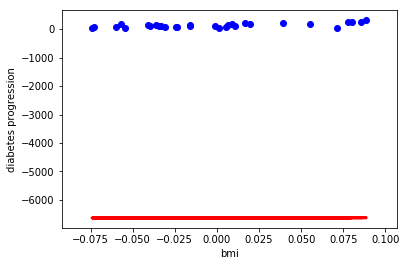

Wall time: 137 ms


In [69]:
%%time
# My own liner regression 
class LinearModel_D1(object):
    
    def __init__(self):
        self.a = np.random.randn(1)[0]
        self.b = np.random.randn(1)[0]
        
    def model(self,x):
        return self.a*x + self.b
    
    def loss(self,x,y):
        cost = (y - self.model(x))**2
        
        g_a = 2*(y - self.model(x))*(-x) # g for gradient
        g_b = 2*(y - self.model(x))*(-1)
        return cost,g_a,g_b
    
    def gradient_descent(self,g_a,g_b,lr = 0.1): #lr for learing rate
        
        self.a -= g_a*lr
        self.b -= g_b*lr
        
        
    def fit(self,X,y):
        count = 0
        precision = 0.0001
        last_a = self.a + 0.1
        last_b = self.b + 0.1
        length = len(X)
        
        cost = 0
        g_a = 0
        g_b = 0
            
        while True:
            if count > 3000:
                break
                
            if (abs(last_a - self.a) < precision) and (abs(last_b - self.b) < precision):
                break
                
            
            for i in range(length):
                cost_, g_a_, g_b_ = self.loss(X[i],y[i])
                cost += cost_
                g_a += g_a_
                g_b += g_b_
                
            last_a = self.a
            last_b = self.b
            # update
            self.gradient_descent(g_a,g_b,0.01)
            count += 1
    def result(self):
        return self.a,self.b


    
lr_model = LinearModel_D1()

lr_model.fit(X_train,y_train)

a, b = lr_model.result()

print(a, b)

y_pred = a*X_test + b

print(y_pred)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

(array([[272394.84126722,  51037.40284593,  68599.25346474,
        121044.56327633, 264108.20779637,  12081.21751867,
         28195.3101823 ,   7041.65873842,  85214.12898041,
        179703.58124936, 217076.4069713 ,  33092.91875628,
         49246.08611051,  92364.07918668,  57559.01141991,
         17933.1179312 , 384294.10128508,  35311.89385941,
        133893.48858573,  17401.45956349, 119656.90490862,
         20711.40976976,   9587.2673124 ,  16362.14282807,
          9199.60894469, 126675.19674717,  43228.47753653,
         69650.91183245, 193524.84819105,  12976.53425409],
       [272484.85283776,  51076.36923665,  68644.428053  ,
        121104.56855873, 264196.83976746,  12100.1797173 ,
         28224.27447697,   7056.13723882,  85264.47706663,
        179776.69272658, 217156.76134566,  33124.29735   ,
         49284.3627015 ,  92416.49667208,  57600.39210968,
         17956.2189282 , 384401.01294894,  35344.30715272,
        133956.5979669 ,  17424.21566062, 119716.56529